In [7]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-17 04:58:27,316: Credentials are already in use. The existing account in the session will be replaced.


In [8]:


#Registers
d0 = QuantumRegister(2, 'num1')
d1 = QuantumRegister(2, 'num2')
d2 = QuantumRegister(2, 'num3')
d3 = QuantumRegister(1, 'cout')
Cin= QuantumRegister(1, 'cin')
q_r = QuantumRegister(8, 'q')
c_r = ClassicalRegister(4, 'result')


#Circuit
circuit = QuantumCircuit(d0,d1,d2,Cin,q_r,d3,c_r)

# Full adder 1
circuit.barrier()
circuit.ccx(d0[0],d0[1],q_r[1])
circuit.cx(d0[0],d0[1])
circuit.id(q_r[1])
circuit.ccx(d0[1],Cin[0],q_r[0])
circuit.id(q_r[1])
circuit.cx(d0[1],Cin[0])
circuit.id(q_r[0])
circuit.id(q_r[1])
circuit.cx(q_r[1],q_r[2])
circuit.cx(q_r[0],q_r[2])
circuit.ccx(q_r[0],q_r[1],q_r[2])
circuit.barrier()

# Full adder 2
circuit.ccx(d1[0],d1[1],q_r[4])
circuit.cx(d1[0],d1[1])
circuit.id(q_r[4])
circuit.ccx(d1[1],q_r[2],q_r[3])
circuit.id(q_r[4])
circuit.cx(d1[1],q_r[2])
circuit.id(q_r[3])
circuit.id(q_r[4])
circuit.cx(q_r[4],q_r[5])
circuit.cx(q_r[3],q_r[5])
circuit.ccx(q_r[3],q_r[4],q_r[5])
circuit.barrier()

# Full adder 3
circuit.ccx(d2[0],d2[1],q_r[7])
circuit.cx(d2[0],d2[1])
circuit.id(q_r[7])
circuit.ccx(d2[1],q_r[5],q_r[6])
circuit.id(q_r[7])
circuit.cx(d2[1],q_r[5])
circuit.id(q_r[6])
circuit.id(q_r[7])
circuit.cx(q_r[7],d3[0])
circuit.cx(q_r[6],d3[0])
circuit.ccx(q_r[6],q_r[7],d3[0])
circuit.barrier()

#Measure
circuit.measure(Cin[0],c_r[0])
circuit.measure(q_r[2],c_r[1])
circuit.measure(q_r[5],c_r[2])
circuit.measure(d3[0],c_r[3])


In [9]:
#Encode bits
def Encode(a,b,i,j):
    
    d0 = QuantumRegister(2, 'num1')
    d1 = QuantumRegister(2, 'num2')
    d2 = QuantumRegister(2, 'num3')
    d3 = QuantumRegister(1, 'cout')
    Cin= QuantumRegister(1, 'cin')
    q_r = QuantumRegister(8, 'q')
    c_r = ClassicalRegister(4, 'result')
   
    circuit0 = QuantumCircuit(d0,d1,d2,Cin,q_r,d3,c_r)
    if a==1:
        circuit0.x(i)
                   
    if b==1:
        circuit0.x(j)
    
    
    return circuit0

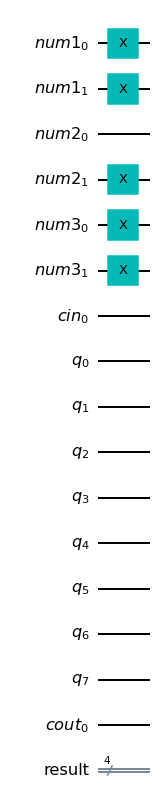

In [10]:
Num0 = [1,0,1] # Initialize number 1  
Num1 = [1,1,1] # Initialize number 2  
Q1=[4,2,0]
Q2=[5,3,1]
x=1

for a, b ,i,j in zip(Num0,Num1,Q1,Q2):

            if(x<len(Q1)):
                globals()['circuit%s' %x] = Encode(a,b,i,j)
                x+=1
            else:
                circuit3 = Encode(a,b,i,j)
                
                
                
else:
    
    qc=circuit1.compose(circuit2)
    qc1=qc.compose(circuit3)
    display(qc1.draw())
                
        
                

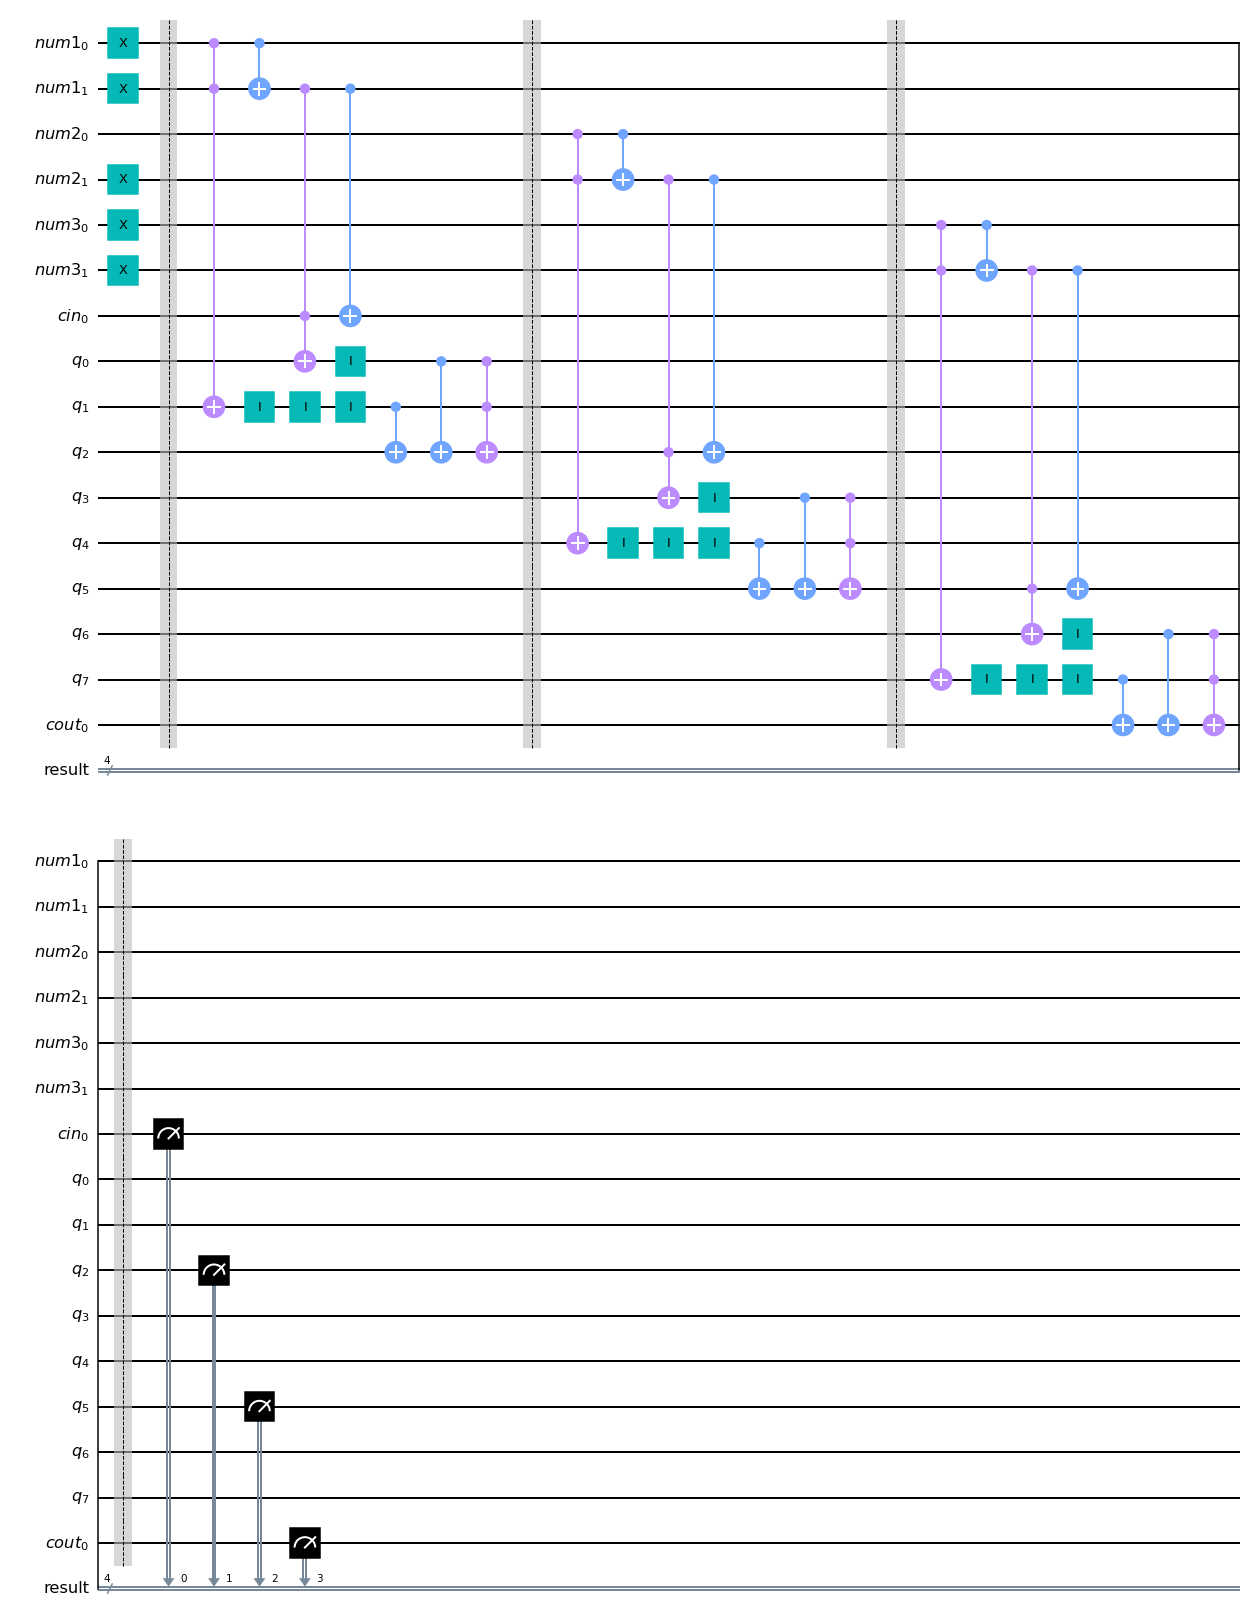

In [11]:
#Draw 3-bit full adder 
qc2=qc1.compose(circuit)
display(qc2.draw())

In [12]:
#Display the result
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc2,shots=1,memory=True)
result = job.result()
counts =result.get_memory()[0]
print('The result is:',counts)


The result is: 1100
